In [9]:
import rasterio
from matplotlib import pyplot
import numpy as np

image_filenameB02 = "T27CWV_20191214T094009_B02_10m.jp2"
image_filenameB03 = "T27CWV_20191214T094009_B03_10m.jp2"
image_filenameB08 = "T27CWV_20191214T094009_B08_10m.jp2"

my_imageB02 = rasterio.open(image_filenameB02)
my_imageB03 = rasterio.open(image_filenameB03)
my_imageB08 = rasterio.open(image_filenameB08)

print(my_imageB02)
print(my_imageB03)
print(my_imageB08)

<open DatasetReader name='T27CWV_20191214T094009_B02_10m.jp2' mode='r'>
<open DatasetReader name='T27CWV_20191214T094009_B03_10m.jp2' mode='r'>
<open DatasetReader name='T27CWV_20191214T094009_B08_10m.jp2' mode='r'>


In [10]:
blue = my_imageB02.read(1)
green = my_imageB03.read(1)
nir = my_imageB08.read(1)

def scale(band): # scale values for display purposes
    return band /10000

blue = scale(my_imageB02.read(1))
green = scale(my_imageB03.read(1))
nir = scale(my_imageB08.read(1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


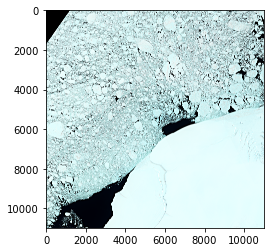

In [3]:
x = np.dstack((nir, green, blue))
pyplot.imshow(x)

In [11]:
guano_reordered = np.moveaxis(x, [0, 1, 2], [1, 2, 0])
guano_reordered.shape

(3, 10980, 10980)

In [12]:
with rasterio.open(
    'guano.tif',                           
    'w',                                            
    driver='GTiff',                                 
    height=guano_reordered.shape[1],                  
    width=guano_reordered.shape[2],                   
    count=guano_reordered.shape[0],                   
    dtype=guano_reordered.dtype,                      
    crs=my_imageB02.profile['crs'],                    
    transform=my_imageB02.profile['transform']         
    ) as my_raster_writer:
        my_raster_writer.write(guano_reordered)      

print('Finished writing rgb_reordered')

Finished writing rgb_reordered
